## Research Methods Final Assessment

This notebook generates the required visualisations for:

1. Sampling from a Gaussian distribution with mean 14 and standard deviation 2, and plotting multiple normalised histograms (different sample sizes) on a single plot with half-integer bin boundaries.
2. Testing whether that Gaussian distribution is a good model for the total score from rolling four dice (fake data), comparing with 200 samples and with 10,000 samples.

All histograms are normalised to have the same total area using `density=True`.


In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Reproducibility
rng = np.random.default_rng(42)

# Distribution parameters
mu = 14
sigma = 2


In [5]:
def half_integer_bins(x_min=0.5, x_max=27.5, bin_width=1.0):
    """
    Create bin edges with half-integer boundaries.
    Example: 0.5, 1.5, 2.5, ..., 27.5 (bin width = 1).
    """
    # Ensure inclusive of the endpoint
    edges = np.arange(x_min, x_max + bin_width, bin_width)
    return edges

def gaussian_samples(n, mu=14, sigma=2, rng=None):
    """
    Generate n samples from N(mu, sigma).
    """
    if rng is None:
        rng = np.random.default_rng()
    return rng.normal(loc=mu, scale=sigma, size=n)

def dice_sum_samples(n, n_dice=4, sides=6, rng=None):
    """
    Generate n samples of the total score from rolling n_dice fair dice with given sides.
    Each die is uniform integer in [1, sides].
    """
    if rng is None:
        rng = np.random.default_rng()
    rolls = rng.integers(1, sides + 1, size=(n, n_dice))
    return rolls.sum(axis=1)


* #### Bin choice (half-integer boundaries)


In [6]:
# Bin edges from 0.5 to 27.5 with width 1.0 (half-integer boundaries)
bins = half_integer_bins(x_min=0.5, x_max=27.5, bin_width=1.0)

# For plotting range (optional)
x_plot = np.linspace(0.5, 27.5, 600)

## Q1 — Multiple normalised histograms for different sample sizes

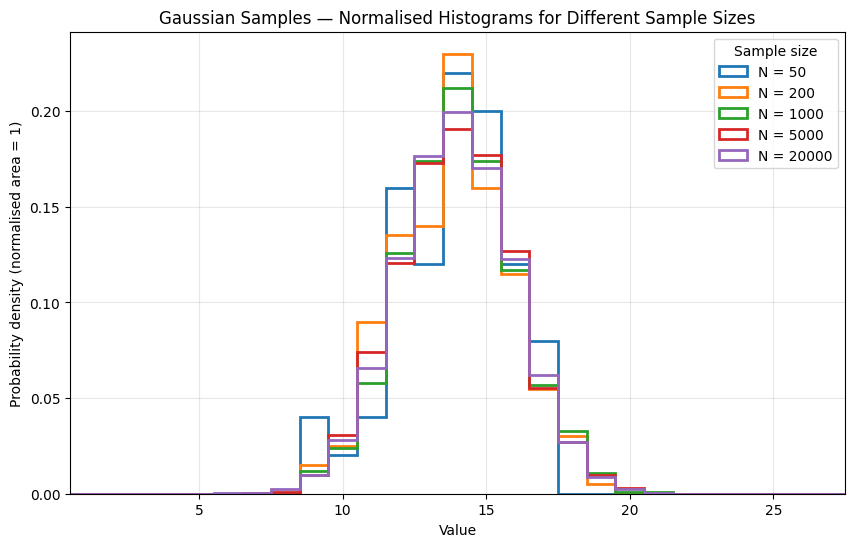

In [10]:
sample_sizes = [50, 200, 1000, 5000, 20000]  # 5 different sizes (you can tweak)

plt.figure(figsize=(10, 6))

for n in sample_sizes:
    data = gaussian_samples(n, mu=mu, sigma=sigma, rng=rng)
    # histtype='step' keeps it clean when overlaying many
    plt.hist(
        data,
        bins=bins,
        density=True,          # Normalise to same area
        histtype="step",
        linewidth=2,
        label=f"N = {n}"
    )

plt.title("Gaussian Samples — Normalised Histograms for Different Sample Sizes")
plt.xlabel("Value")
plt.ylabel("Probability density (normalised area = 1)")
plt.legend(title="Sample size")
plt.grid(True, alpha=0.3)
plt.xlim(0.5, 27.5)
plt.show()


#### Comparing histogram differences vs a reference

In [8]:
def hist_density(data, bins):
    """
    Return histogram density values (not counts) for given data and bins.
    """
    density, edges = np.histogram(data, bins=bins, density=True)
    return density

# Reference histogram using a very large sample
ref_n = 500_000
ref_data = gaussian_samples(ref_n, mu=mu, sigma=sigma, rng=rng)
ref_density = hist_density(ref_data, bins)

# Compare each sample size to reference
errors = []
for n in sample_sizes:
    data = gaussian_samples(n, mu=mu, sigma=sigma, rng=rng)
    d = hist_density(data, bins)
    mae = np.mean(np.abs(d - ref_density))
    errors.append(mae)

# Print a simple table
print("Q1: Mean Absolute Difference (MAD) vs reference histogram")
print(f"Reference size: {ref_n}")
for n, e in zip(sample_sizes, errors):
    print(f"N = {n:>6}  ->  MAD = {e:.6f}")


Q1: Mean Absolute Difference (MAD) vs reference histogram
Reference size: 500000
N =     50  ->  MAD = 0.009789
N =    200  ->  MAD = 0.005482
N =   1000  ->  MAD = 0.002343
N =   5000  ->  MAD = 0.000972
N =  20000  ->  MAD = 0.000518


#### Error Trend

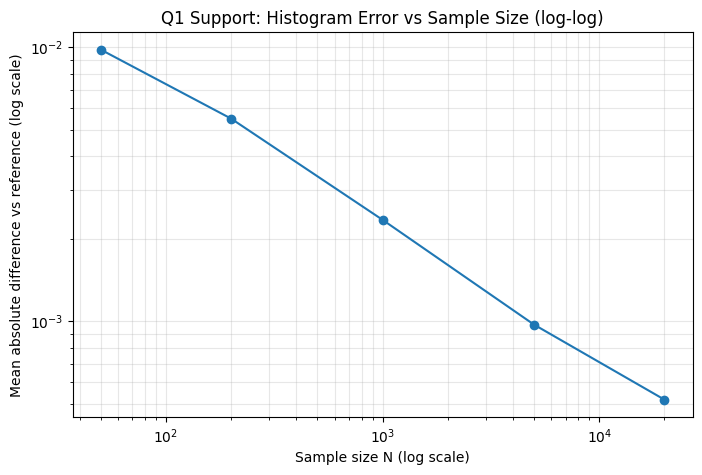

In [9]:
plt.figure(figsize=(8, 5))
plt.plot(sample_sizes, errors, marker="o")
plt.xscale("log")
plt.yscale("log")
plt.title("Q1 Support: Histogram Error vs Sample Size (log-log)")
plt.xlabel("Sample size N (log scale)")
plt.ylabel("Mean absolute difference vs reference (log scale)")
plt.grid(True, which="both", alpha=0.3)
plt.show()


## Q2 — Dice-sum data vs Gaussian model

In [11]:
gauss_overlay_n = 200_000  # high sample size for smooth histogram overlay
gauss_overlay = gaussian_samples(gauss_overlay_n, mu=mu, sigma=sigma, rng=rng)

print(f"Gaussian overlay sample size: {gauss_overlay_n}")
print(f"Gaussian overlay mean ~ {gauss_overlay.mean():.3f}, std ~ {gauss_overlay.std(ddof=1):.3f}")

Gaussian overlay sample size: 200000
Gaussian overlay mean ~ 14.002, std ~ 2.001


* #### 200 dice samples vs Gaussian

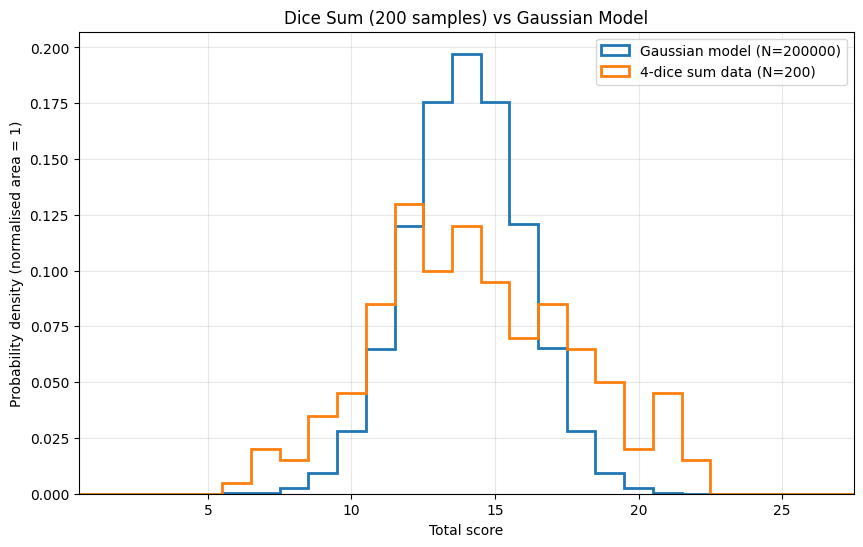

In [13]:
dice_n_small = 200
dice_small = dice_sum_samples(dice_n_small, n_dice=4, sides=6, rng=rng)

plt.figure(figsize=(10, 6))

# Gaussian (smooth reference)
plt.hist(
    gauss_overlay,
    bins=bins,
    density=True,
    histtype="step",
    linewidth=2,
    label=f"Gaussian model (N={gauss_overlay_n})"
)

# Dice-sum data
plt.hist(
    dice_small,
    bins=bins,
    density=True,
    histtype="step",
    linewidth=2,
    label=f"4-dice sum data (N={dice_n_small})"
)

plt.title("Dice Sum (200 samples) vs Gaussian Model")
plt.xlabel("Total score")
plt.ylabel("Probability density (normalised area = 1)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.xlim(0.5, 27.5)
plt.show()


* #### 10,000 dice samples vs Gaussian

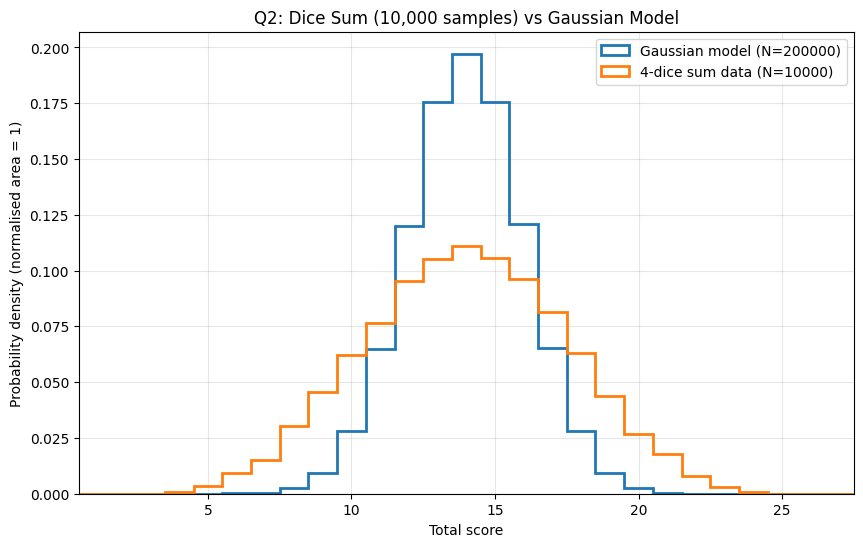

In [14]:
dice_n_large = 10_000
dice_large = dice_sum_samples(dice_n_large, n_dice=4, sides=6, rng=rng)

plt.figure(figsize=(10, 6))

# Gaussian (smooth reference)
plt.hist(
    gauss_overlay,
    bins=bins,
    density=True,
    histtype="step",
    linewidth=2,
    label=f"Gaussian model (N={gauss_overlay_n})"
)

# Dice-sum data (10k)
plt.hist(
    dice_large,
    bins=bins,
    density=True,
    histtype="step",
    linewidth=2,
    label=f"4-dice sum data (N={dice_n_large})"
)

plt.title("Q2: Dice Sum (10,000 samples) vs Gaussian Model")
plt.xlabel("Total score")
plt.ylabel("Probability density (normalised area = 1)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.xlim(0.5, 27.5)
plt.show()


* #### Computing and printing the stats

In [15]:
theory_mean = 4 * 3.5
theory_var = 4 * (35/12)
theory_std = np.sqrt(theory_var)

print("Theoretical (4 fair dice):")
print(f"Mean = {theory_mean:.3f}")
print(f"Std  = {theory_std:.3f}")

print("\nDice data (N=200):")
print(f"Mean = {dice_small.mean():.3f}")
print(f"Std  = {dice_small.std(ddof=1):.3f}")

print("\nDice data (N=10,000):")
print(f"Mean = {dice_large.mean():.3f}")
print(f"Std  = {dice_large.std(ddof=1):.3f}")

print("\nGaussian model used in the assessment:")
print(f"Mean = {mu:.3f}")
print(f"Std  = {sigma:.3f}")


Theoretical (4 fair dice):
Mean = 14.000
Std  = 3.416

Dice data (N=200):
Mean = 14.315
Std  = 3.478

Dice data (N=10,000):
Mean = 13.995
Std  = 3.471

Gaussian model used in the assessment:
Mean = 14.000
Std  = 2.000
